In [1]:
from collections import namedtuple
from functools import partial
from pathlib import Path

from IPython.display import Audio
%config InlineBackend.figure_format = 'svg'

import librosa as lr
from librosa import display

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (13, 5)

In [2]:
def find_file(query, path):
    """Return a path to file in path if query is in filename. Raise FileNotFoundError if it does not exist."""
    file = sorted(p for p in path.iterdir() if query in p.name)[0]
    if not file.exists():
        raise FileNotFoundError
    return file

TrackClip = namedtuple('TrackClip', 'path start stop')

In [4]:
cwd = Path.cwd()
uncut = cwd / 'tracks'

find_song = partial(find_file, path=uncut)

hey_oh = TrackClip(find_song('hey_oh'), 0.0, 4.53)
funky_monks = TrackClip(find_song('funky_monks'), 11.27, 16.73)

In [11]:
track_clip = hey_oh

y, sr = lr.load(track_clip.path, 
                offset=track_clip.start, 
                duration=track_clip.stop - track_clip.start, 
                res_type='kaiser_fast',
#                 res_type='kaiser_best',
               )
y.shape, sr, divmod(lr.get_duration(y), 60)

((99887,), 22050, (0.0, 4.530022675736961))

In [12]:
Audio(data=y, rate=sr)

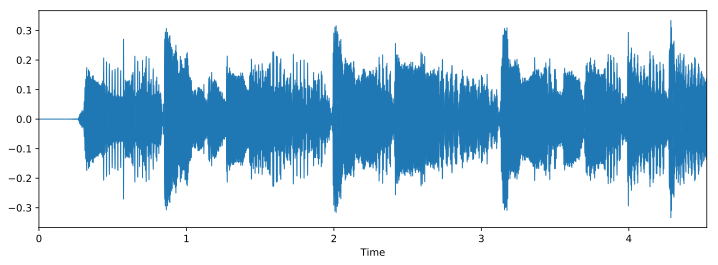

In [13]:
plt.figure(figsize=(12, 4))
lr.display.waveplot(y, sr);

# Spectrograms

### Short-time Fourier Transform --> to Spectrogram DB

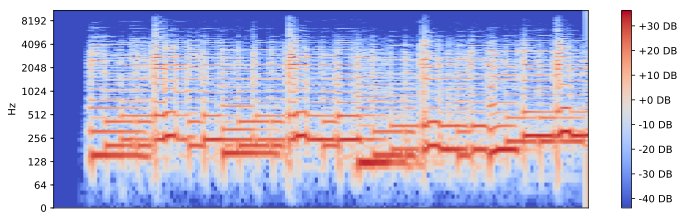

In [14]:
D = lr.stft(y)
S = abs(D)
S_db = lr.amplitude_to_db(S)  # same as lr.power_to_db(D**2)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
lr.display.specshow(S_db, y_axis='log')
plt.colorbar(format='%+2.0f DB')

# plt.subplot(2, 1, 2)
# lr.display.specshow(S_db, x_axis='time', y_axis='linear')
# plt.colorbar(format='%+2.0f DB');

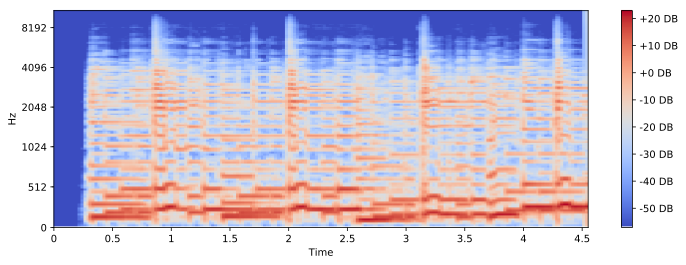

In [22]:
S_mel = lr.feature.melspectrogram(y)
S_mel_db = lr.power_to_db(S_mel)

plt.figure(figsize=(12, 4))
lr.display.specshow(S_mel_db, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f DB');

### Constant-Q Transform

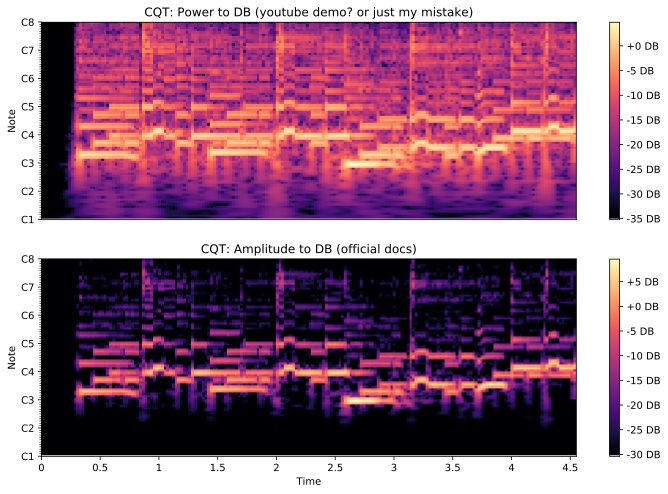

In [16]:
C = abs(lr.cqt(y, sr))


plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.title('CQT: Power to DB (youtube demo? or just my mistake)')
lr.display.specshow(lr.power_to_db(C, top_db=40), y_axis='cqt_note')
plt.colorbar(format='%+2.0f DB')

plt.subplot(2, 1, 2)
plt.title('CQT: Amplitude to DB (official docs)')
lr.display.specshow(lr.amplitude_to_db(C, top_db=40), x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f DB');

# Spectral Features

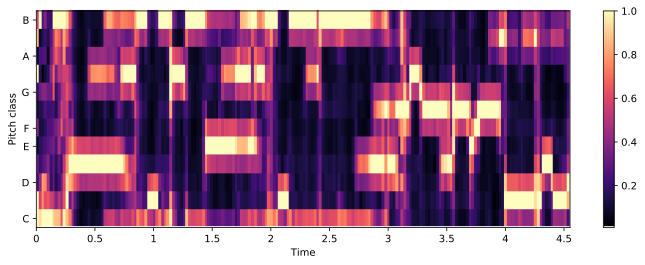

In [17]:
chroma_cqt = lr.feature.chroma_cqt(C=C, sr=sr)

plt.figure(figsize=(12, 4))
lr.display.specshow(chroma_cqt, x_axis='time', y_axis='chroma')
plt.colorbar();

/Users/matteding/miniconda3/envs/audio/lib/python3.7/site-packages/librosa/display.py:665: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


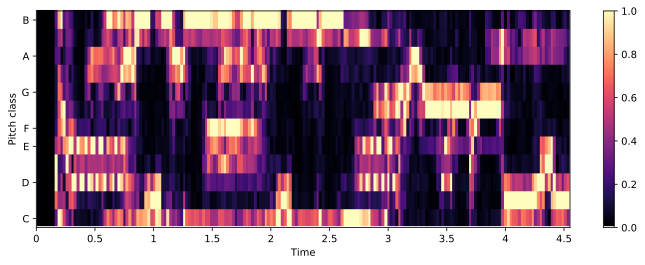

In [18]:
chroma_stft = lr.feature.chroma_stft(S=D, sr=sr)
# chroma_stft = lr.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(12, 4))
lr.display.specshow(chroma_stft, x_axis='time', y_axis='chroma')
plt.colorbar();

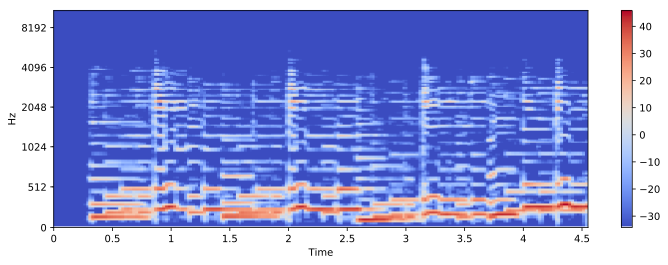

In [23]:
M = lr.feature.melspectrogram(y, sr)

plt.figure(figsize=(12, 4))
lr.display.specshow(lr.amplitude_to_db(M), x_axis='time', y_axis='mel', fmax=None)
plt.colorbar();

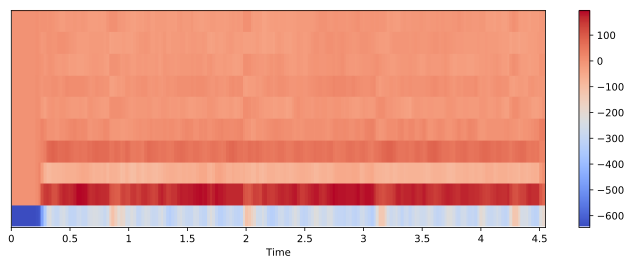

In [20]:
MFCC = lr.feature.mfcc(y, sr, dct_type=2, n_mfcc=10)

plt.figure(figsize=(12, 4))
lr.display.specshow(MFCC, x_axis='time')
plt.colorbar();

In [ ]:
np.mean(MFCC, axis=1)

In [ ]:
tonnetz = lr.feature.tonnetz(y, sr)

plt.figure(figsize=(12, 4))
lr.display.specshow(tonnetz, x_axis='time', y_axis='tonnetz')
plt.colorbar();